In [128]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from dateutil import parser
from tqdm import tqdm

import pandas as pd
import numpy as np

base_link = "https://bitcointalk.org/index.php?board=159."

response = urlopen(base_link + "0")
html = response.read()
soup = BeautifulSoup(html, 'html.parser')

max_page = int(list(soup.find(id="toppages"))[-3].text)

d = list()

for i in tqdm(range(max_page)):
    link = base_link + str(i*40)
    response = urlopen(link)
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')    
    
    for res in soup.find_all('a'):
        if "ANN" in res.text:
            d.append({"links":res.get('href'), "text" : res.text, "date" : 0})

df = pd.DataFrame(data=d)

print(df.head())    

100%|██████████| 323/323 [20:48<00:00,  2.59s/it]

   date                                              links  \
0     0  https://bitcointalk.org/index.php?topic=2170764.0   
1     0  https://bitcointalk.org/index.php?topic=2015949.0   
2     0  https://bitcointalk.org/index.php?topic=2062875.0   
3     0  https://bitcointalk.org/index.php?topic=2097832.0   
4     0  https://bitcointalk.org/index.php?topic=2044729.0   

                                                text  
0  [ANN][PRE-ICO] EcoGreenHouse - Organic Product...  
1  [ANN]★CryptoBridge★BCO★🔹Decentralized EXchange...  
2  [ANN][CND] Cindicator - Hybrid Intelligence fo...  
3  [ANN] WORLDCORE ICO - Reliable investment into...  
4  [ANN] [ICO] VIBEHub | Crypto Based Virtual Rea...  


In [143]:
print(df.info())
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7326 entries, 0 to 7330
Data columns (total 3 columns):
date     7326 non-null object
links    7326 non-null object
text     7326 non-null object
dtypes: object(3)
memory usage: 228.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 3 columns):
date     7326 non-null object
links    7326 non-null object
text     7326 non-null object
dtypes: object(3)
memory usage: 171.8+ KB
None


In [147]:
for i in tqdm(range(len(df.links))):
    if df.xs(i)['date'] == 0:
        link = df.xs(i)['links']
        response = urlopen(link)
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')
        try:
            dt = parser.parse(soup.find_all('span', {'class' : 'edited'})[0].text)
            df.set_value(i, 'date', dt)
        except:
            try:
                dt = parser.parse(soup.find_all("div",{'class' : 'smalltext'})[1].text)
                df.set_value(i, 'date', dt)
            except:
                continue
    if i%100==0:
        df.to_csv('ICO.txt', header=True, index=False, sep='\t')
            
print(df.tail())


100%|██████████| 7326/7326 [00:57<00:00, 126.71it/s] 

                     date                                             links  \
7321  2014-01-05 06:38:59  https://bitcointalk.org/index.php?topic=399504.0   
7322  2014-01-07 20:54:22  https://bitcointalk.org/index.php?topic=404058.0   
7323  2014-01-06 15:31:15  https://bitcointalk.org/index.php?topic=401382.0   
7324  2014-01-05 01:49:46  https://bitcointalk.org/index.php?topic=399279.0   
7325  2013-12-24 05:11:19  https://bitcointalk.org/index.php?topic=382896.0   

                                                   text  
7321               [ANN] BeerCoin launched [05-01-2014]  
7322            [ANN][EMG] Ermahgerd Meme Competition!   
7323                          [ANN] EliteCoin [XLC] IPO  
7324                            [ANN] ShoeCoin Launched  
7325  [ANN] JediCoin and SithCoin - January 14th - F...  


In [154]:
df = df[df.date != 0]
df.to_csv('ICO.txt', header=True, index=False, sep='\t')


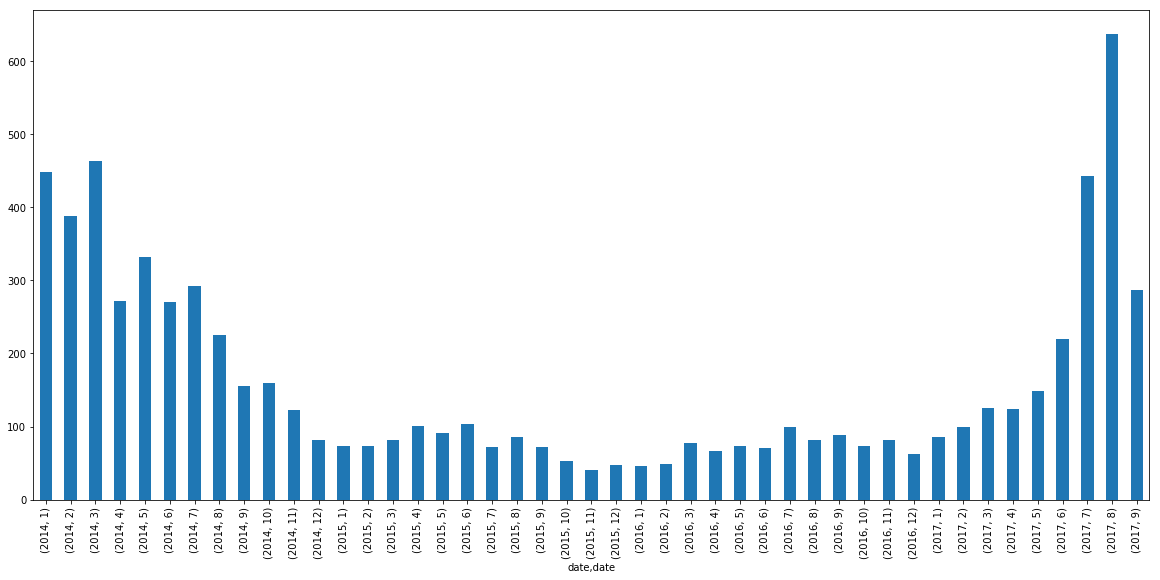

In [160]:
import matplotlib.pyplot as plt
df[df["date"].dt.year > 2013]["date"].groupby((df["date"].dt.year, df["date"].dt.month)).count().plot(kind="bar")
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

In [161]:
for x in df.text:
    if "scam" in x.lower():
        print(x)

[ANN][ICO SCAM TESTING] We begin to test our cloud theory on several ICOs
[NO ANN] Buzzcoin most likely a scam
[ANN] CoinonatX- Scam Alert - Unmoderated thread
[ANN] 🔺🔺🔺PYRAMIDUM🔺🔺🔺 Buy scam and make money!
(ANN) XTDCOIN SCAM!!!!!!!!!!!!!!!!!!!
MOVED: [ANN] 🔥🔥🔥PYRAMIDUM🔥🔥🔥 Buy scam and make money!
[ANN][ICO][BOUNTY] ScamToken - The World's First 100% Bullshit ICO.
ANTI SCAM COIN ALERT THREAD [ANN] [ASC]
[ANN] SCAM_STAMP Token - Mark an address as SCAM and maybe get your ether back
[ANN] scamcoin iCO offering the the potential for minimum ROI of %10000000000000
Re: [ANN][ICO] Polybius -  SCAM
[ANN] [FHT] BITCOINSCAMFIGHTERS #1 LEGAL SERVICES-OFFERING & ANTI-SCAM PLATFORM
[ANN]1337 YOBIT (SCAM)
[ANN] ✊ FHT - BITCOINSCAMFIGHTERS.com! ✊ ICO STARTS 3 JUNE 2017! ✊ 274.83+ ETH ✊
[ANN] Torcoin is a scam signature campaign. No bounties.
[ANN] Ebitz - Unmoderated thread - Confirmed connection with the Opair scam
[ANN][FIND] FindCoin | Update Wallet If You Haven't! | Community Anti-Scam Token
[AN